In this notebook, there will be two section,  kNN with Census Income datasets. The analysis is to predict whether income exceeds $50K/yr based on census data.

Import datasets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital-status', 'occupation',
         'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(dataset_url, names=names)

Have a look of content.

In [2]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Have a look at statistic data frame.

In [3]:
df.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Transform the data sets.

In [4]:
df['income']=df['income'].map({' <=50K': 0, ' >50K': 1})

In [5]:
df['workclass']=df['workclass'].map({' Private': 1, ' Self-emp-not-inc': 2,
                                    ' Self-emp-inc': 3, ' Federal-gov': 4,
                                    ' Local-gov': 5, ' State-gov': 6, ' Without-pay': 7,
                                    ' Never-worked': 8})

In [6]:
df['education']=df['education'].map({' Bachelors': 1, ' Some-college': 2,
                                    ' 11th': 3, ' HS-grad': 4,
                                    ' Prof-school': 5, ' Assoc-acdm': 6, ' Assoc-voc': 7,
                                    ' 9th': 8, ' 7th-8th': 9, ' 12th': 10, ' Masters': 11,
                                    ' 1st-4th': 12, ' 10th': 13, ' Doctorate': 14, 
                                    ' 5th-6th': 15, ' Preschool': 16})

In [7]:
df['marital-status']=df['marital-status'].map({' Married-civ-spouse': 1, ' Divorced': 2,
                                    ' Never-married': 3, ' Separated': 4,
                                    ' Widowed': 5, ' Married-spouse-absent': 6, ' Married-AF-spouse': 7})

In [8]:
df['occupation']=df['occupation'].map({' Tech-support': 1, ' Craft-repair': 2,
                                    ' Other-service': 3, ' Sales': 4,
                                    ' Exec-managerial': 5, ' Prof-specialty': 6, ' Handlers-cleaners': 7,
                                      ' Machine-op-inspct': 8, ' Adm-clerical': 9,
                                    ' Farming-fishing': 10, ' Transport-moving': 11,
                                    ' Priv-house-serv': 12, ' Protective-serv': 13, ' Armed-Forces': 14})

In [9]:
df['relationship']=df['relationship'].map({' Wife': 1, ' Own-child': 2,
                                    ' Husband': 3, ' Not-in-family': 4,
                                    ' Other-relative': 5, ' Unmarried': 6})

In [10]:
df['race']=df['race'].map({' White': 1, ' Asian-Pac-Islander': 2,
                                    ' Amer-Indian-Eskimo': 3, ' Other': 4,
                                    ' Black': 5})

In [11]:
df['sex']=df['sex'].map({' Female': 1, ' Male': 2})

In [12]:
df['native-country']=df['native-country'].map({' United-States': 1, ' Cambodia': 2,
                                    ' England': 3, ' Puerto-Rico': 4,
                                    ' Canada': 5, ' Germany': 6, ' Outlying-US(Guam-USVI-etc)': 7,
                                      ' India': 8, ' Japan': 9,
                                    ' Greece': 10, ' South': 11,
                                    ' China': 12, ' Cuba': 13, ' Iran': 14,
                                              ' Honduras': 15, ' Philippines': 16,
                                    ' Italy': 17, ' Poland': 18,
                                    ' Jamaica': 19, ' Vietnam': 20, ' Mexico': 21,
                                      ' Portugal': 22, ' Ireland': 23,
                                    ' France': 24, ' Dominican-Republic': 25,
                                    ' Laos': 26, ' Ecuador': 27,
                                              ' Taiwan': 28, ' Haiti': 29,
                                    ' Columbia': 30, ' Hungary': 31,
                                    ' Guatemala': 32, ' Nicaragua': 33, ' Scotland': 34,
                                      ' Thailand': 35, ' Yugoslavia': 36,
                                    ' El-Salvador': 37, ' Trinadad&Tobago': 38,
                                    ' Peru': 39, ' Hong': 40, ' Holand-Netherland': 41})

In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6.0,77516,1,13,3,9.0,4,1,2,2174,0,40,1.0,0
1,50,2.0,83311,1,13,1,5.0,3,1,2,0,0,13,1.0,0
2,38,1.0,215646,4,9,2,7.0,4,1,2,0,0,40,1.0,0
3,53,1.0,234721,3,7,1,7.0,3,5,2,0,0,40,1.0,0
4,28,1.0,338409,1,13,1,6.0,1,5,1,0,0,40,13.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       30725 non-null  float64
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  int64  
 4   education_num   32561 non-null  int64  
 5   marital-status  32561 non-null  int64  
 6   occupation      30718 non-null  float64
 7   relationship    32561 non-null  int64  
 8   race            32561 non-null  int64  
 9   sex             32561 non-null  int64  
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  31977 non-null  float64
 14  income          32561 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 3.7 MB


check for null values

In [15]:
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

delete lines with '?'

In [16]:
df.replace(' ?', np.nan,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30161 non-null  int64  
 1   workclass       30161 non-null  float64
 2   fnlwgt          30161 non-null  int64  
 3   education       30161 non-null  int64  
 4   education_num   30161 non-null  int64  
 5   marital-status  30161 non-null  int64  
 6   occupation      30161 non-null  float64
 7   relationship    30161 non-null  int64  
 8   race            30161 non-null  int64  
 9   sex             30161 non-null  int64  
 10  capital-gain    30161 non-null  int64  
 11  capital-loss    30161 non-null  int64  
 12  hours-per-week  30161 non-null  int64  
 13  native-country  30161 non-null  float64
 14  income          30161 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 3.7 MB


In [17]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

remove duplicate rows

In [18]:
print("Before removing duplicates:", df.duplicated().sum())
df = df[~df.duplicated()]
print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 23
After removing duplicates: 0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30138 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30138 non-null  int64  
 1   workclass       30138 non-null  float64
 2   fnlwgt          30138 non-null  int64  
 3   education       30138 non-null  int64  
 4   education_num   30138 non-null  int64  
 5   marital-status  30138 non-null  int64  
 6   occupation      30138 non-null  float64
 7   relationship    30138 non-null  int64  
 8   race            30138 non-null  int64  
 9   sex             30138 non-null  int64  
 10  capital-gain    30138 non-null  int64  
 11  capital-loss    30138 non-null  int64  
 12  hours-per-week  30138 non-null  int64  
 13  native-country  30138 non-null  float64
 14  income          30138 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 3.7 MB


randomize the data

In [20]:
df = df.sample(frac=1)
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7976,34,1.0,134737,11,14,1,6.0,3,1,2,7688,0,55,1.0,1
25165,25,1.0,233461,6,12,3,1.0,4,1,2,0,0,30,1.0,0
17520,31,2.0,357145,14,16,3,6.0,2,1,1,0,0,48,1.0,0
22941,44,1.0,85440,4,9,1,9.0,3,1,2,0,0,45,1.0,0
17706,36,1.0,279721,4,9,1,11.0,3,1,2,0,0,40,1.0,0


separate the target class from the rest of the attributes


In [21]:
import numpy as np

np.set_printoptions(suppress=True)

xs, ys = np.split(df.values, [-1], axis=1)
ys = ys.reshape(-1)

Select 80% of the dataset for training and 20% for testing.

In [22]:
n_train = len(xs) * 80 // 100
xs_train, xs_test = np.split(xs, [n_train], axis=0)
ys_train, ys_test = np.split(ys, [n_train], axis=0)

print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)

training set shape:	 (24110, 14)
test set shape:		 (6028, 14)


perform a standardization

In [23]:
mu = np.mean(xs_train, axis=0)
sigma = np.std(xs_train, axis=0)

xs_train = (xs_train - mu)/sigma
xs_test = (xs_test - mu)/sigma

see that now this mean vector contains

In [24]:
np.mean(xs_train, axis=0)

array([ 0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
       -0.])

In [25]:
np.mean(xs_test, axis=0)

array([ 0.03730389, -0.0044933 , -0.01482553, -0.00502916, -0.01429519,
       -0.00106593, -0.01106549,  0.02476864, -0.01445751,  0.00023466,
       -0.01470342,  0.0102514 , -0.0124336 ,  0.00563344])

 Implement the Nearest Neighbor (NN) algorithm

In [25]:
class NN:

    def __init__(self, distance):
        self.training_examples = []
        self.distance = distance

    def add_example(self, x, y):
        """
        Add one example to the list of training examples.
        :param x: The vector of feature values
        :param y: The label associated to this example
        """
        self.training_examples.append((x, y))

    def add_examples(self, xs, ys):
        """
        Add a list of examples to the list of training examples.
        :param xs: A list of vectors of fature values
        :param ys: A list of labels associated to the examples
        """
        for x, y in zip(xs, ys):
            self.add_example(x, y)

    def closest_training_example(self, x_q):
        y_closest = None
        x_closest = None
        min_score = float('inf')
        # find closest example
        for x, y in self.training_examples:
            score = self.distance(x_q, x)
            if score < min_score:
                min_score = score
                x_closest = x
                y_closest = y

        return x_closest, y_closest

    def classify(self, xq):
        _, y_hat = self.closest_training_example(xq)
        return y_hat

Define a distance function

In [26]:
def euclidean_distance(x_1, x_2):
    res = 0
    for a_1, a_2 in zip(x_1, x_2):
        res += (a_1 - a_2) ** 2
    res **= 0.5
    return res

Instantiate the NN classifier and train it.

In [27]:
nn_clf = NN(euclidean_distance)

nn_clf.add_examples(xs_train, ys_train)

Define the accuracy measure

In [36]:
def accuracy(ys, ys_hat):
    res = 0
    for y, y_hat in zip(ys, ys_hat):
        if y == y_hat:
            res += 1
    res /= len(ys)
    return res

Test the classifier on both training and test sets

In [29]:
ys_train_pred = []
for x in xs_train:
    y_hat = nn_clf.classify(x)
    ys_train_pred.append(y_hat)

ys_test_pred = []
for x in xs_test:
    y_hat = nn_clf.classify(x)
    ys_test_pred.append(y_hat)

print('Train accuracy of NN', accuracy(ys_train, ys_train_pred))
print('Test accuracy of NN', accuracy(ys_test, ys_test_pred))

Train accuracy of NN 1.0
Test accuracy of NN 0.805408095554081


compare the test result of this classifier to a random classifier

In [30]:
ys_test_pred_random = np.random.randint(1, 4, len(ys_test))
print('Test accuracy of a random classifier', accuracy(ys_test, ys_test_pred_random))

Test accuracy of a random classifier 0.0710019907100199


the result of a random classifier by repeating this experiment many times

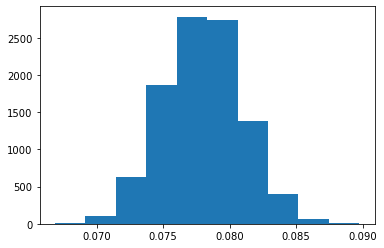

Expected accuracy of a random classifier 0.07792868281353683


In [31]:
accuracies = []
for _ in range(10000):
    ys_test_pred_random = np.random.randint(1, 4, len(ys_test))
    accuracies.append(accuracy(ys_test, ys_test_pred_random))

plt.hist(accuracies)
plt.show()

print('Expected accuracy of a random classifier', np.mean(accuracies))

set the kNN implementation of scikit-learn

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

train the classifier.

In [33]:
knn_clf.fit(xs_train, ys_train)

KNeighborsClassifier(metric='euclidean')

evaluate the result of this classifier

In [34]:
from sklearn.metrics import accuracy_score

ys_test_pred = knn_clf.predict(xs_test)

print('Test accuracy of kNN', accuracy_score(ys_test, ys_test_pred))

Test accuracy of kNN 0.8243198407431984


the cosine distance

In [42]:
knn_clf = KNeighborsClassifier(n_neighbors=1, metric='cosine')

knn_clf.fit(xs_train, ys_train)

ys_test_pred = knn_clf.predict(xs_test)

print('Test accuracy of kNN', accuracy_score(ys_test, ys_test_pred))

Test accuracy of kNN 0.8020902455209025


perform a k-fold cross-validation on the training set

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights': ["uniform", "distance"],
    'n_neighbors': range(1, 11),
    'metric':['euclidean', 'manhattan', 'cosine']}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2)
grid_search.fit(xs_train, ys_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.8s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.8s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.8s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.8s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.8s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=2, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'cosine'],
                          'n_neighbors': range(1, 11),
                          'weights': ['uniform', 'distance']}],
             verbose=2)

the best hyper-parameter values found by the cross-validation

In [44]:
grid_search.best_estimator_

KNeighborsClassifier(metric='cosine', n_neighbors=10)

hyper-parameters on the test set

In [37]:
knn_clf = KNeighborsClassifier(metric='cosine', n_neighbors=10)

knn_clf.fit(xs_train, ys_train)

ys_train_pred = knn_clf.predict(xs_train)
ys_test_pred = knn_clf.predict(xs_test)

print('Train accuracy of kNN', accuracy(ys_train, ys_train_pred))
print('Test accuracy of kNN', accuracy(ys_test, ys_test_pred))

Train accuracy of kNN 0.8585234342596433
Test accuracy of kNN 0.8283012607830126
